# lr_schedules

This project currently just contains `LinearScheduler`, for custom linear learning rate schedules.

In [18]:
from lr_schedules import LinearScheduler
import matplotlib.pyplot as plt
import torch

## PyTorch example, triangle

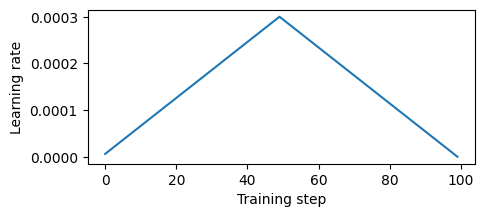

In [19]:
times = [0, 0.5, 1]
values = [0, 1, 0]

W = torch.randn(10, 10, requires_grad=True)
optimizer = torch.optim.AdamW(
    [W], lr=3e-4, betas=(0.9, 0.98), eps=1e-9, weight_decay=0.01
)
linear_scheduler = LinearScheduler(times, values, total_training_steps=100)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, linear_scheduler)

lr_vals = []
for step in range(100):
    optimizer.zero_grad()
    loss = torch.sum(W**2)
    loss.backward()
    optimizer.step()
    scheduler.step()
    lr_vals.append(optimizer.param_groups[0]["lr"])

plt.figure(figsize=(5, 2))
plt.plot(lr_vals)
plt.xlabel("Training step")
plt.ylabel("Learning rate")
plt.show()

## Pytorch example, ramp up and down

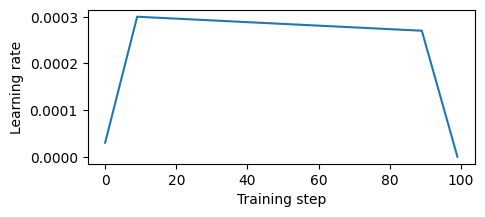

In [20]:
times = [0, 0.1, 0.9, 1]
values = [0, 1, 0.9, 0]

W = torch.randn(10, 10, requires_grad=True)
optimizer = torch.optim.AdamW(
    [W], lr=3e-4, betas=(0.9, 0.98), eps=1e-9, weight_decay=0.01
)
linear_scheduler = LinearScheduler(times, values, total_training_steps=100)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, linear_scheduler)

lr_vals = []
for step in range(100):
    optimizer.zero_grad()
    loss = torch.sum(W**2)
    loss.backward()
    optimizer.step()
    scheduler.step()
    lr_vals.append(optimizer.param_groups[0]["lr"])

plt.figure(figsize=(5, 2))
plt.plot(lr_vals)
plt.xlabel("Training step")
plt.ylabel("Learning rate")
plt.show()